In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Student Engagement Level-Binary.csv")

df.head()

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,L


In [3]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Student ID                                      0
# Logins                                        0
# Content Reads                                 0
# Forum Reads                                   0
# Forum Posts                                   0
# Quiz Reviews before submission                0
Assignment 1 lateness indicator                 0
Assignment 2 lateness indicator                 0
Assignment 3 lateness indicator                 0
Assignment 1 duration to submit (in hours)      0
Assignment 2 duration to submit (in hours)      0
Assignment 3 duration to submit (in hours)      0
Average time to submit assignment (in hours)    0
Engagement Level                                0
dtype: int64


In [4]:
df.describe()

,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours)
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,79.897119,271.843621,2.156379,0.146091,2.045267,0.024691,0.024691,0.014403,227.659499,136.916324,168.520953,177.698925
std,41.293639,106.180726,8.898293,0.606881,1.964113,0.155343,0.155343,0.119269,96.342083,82.754479,101.934682,88.394268
min,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.883333,6.200000,18.716667,36.327778
25%,58.000000,196.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,147.066667,58.708333,85.558333,99.620833
50%,74.000000,252.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,191.033333,102.791667,128.133333,144.741667
75%,95.000000,338.750000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,306.045833,212.112500,236.616667,250.500000
max,647.000000,1007.000000,58.000000,6.000000,12.000000,1.000000,1.000000,1.000000,558.000000,296.250000,632.000000,495.333333


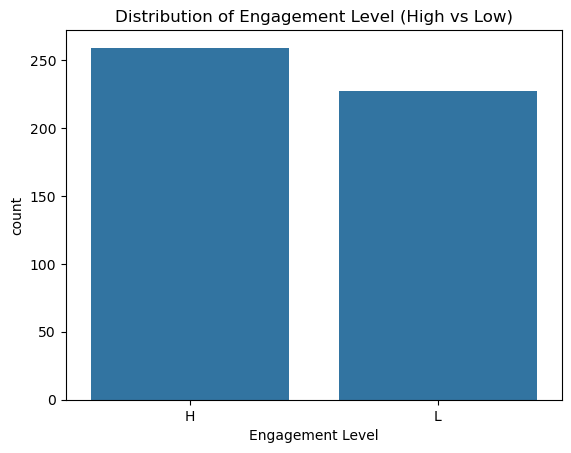

In [5]:
sns.countplot(x='Engagement Level', data=df)
plt.title("Distribution of Engagement Level (High vs Low)")
plt.show()

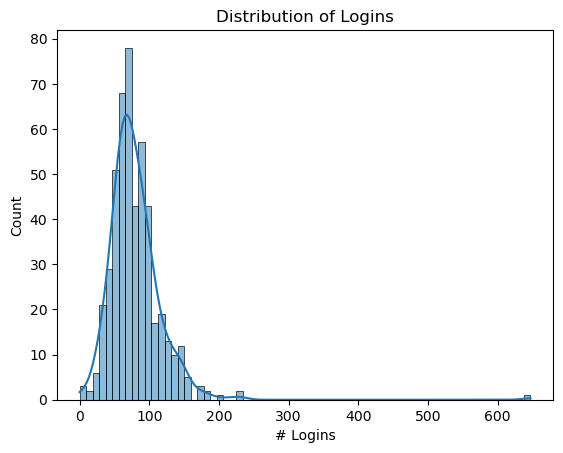

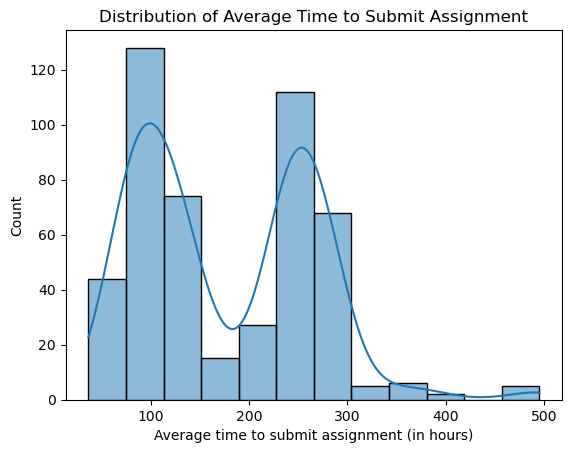

In [6]:
sns.histplot(df['# Logins'], kde=True)
plt.title("Distribution of Logins")
plt.show()

sns.histplot(df['Average time to submit assignment (in hours)'], kde=True)
plt.title("Distribution of Average Time to Submit Assignment")
plt.show()

In [7]:
label_encoder = LabelEncoder()
df['Engagement Level'] = label_encoder.fit_transform(df['Engagement Level'])

In [8]:
X = df.drop(['Student ID', 'Engagement Level'], axis=1)  
y = df['Engagement Level']  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


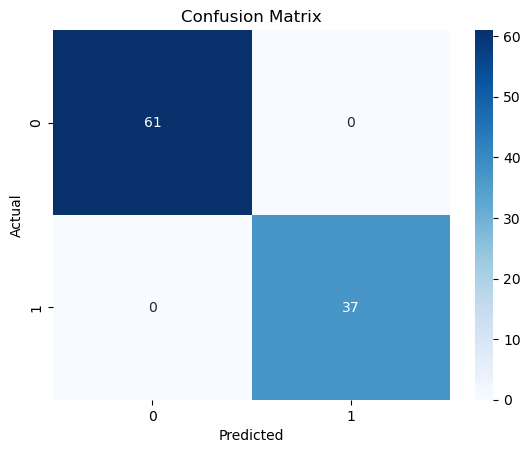

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

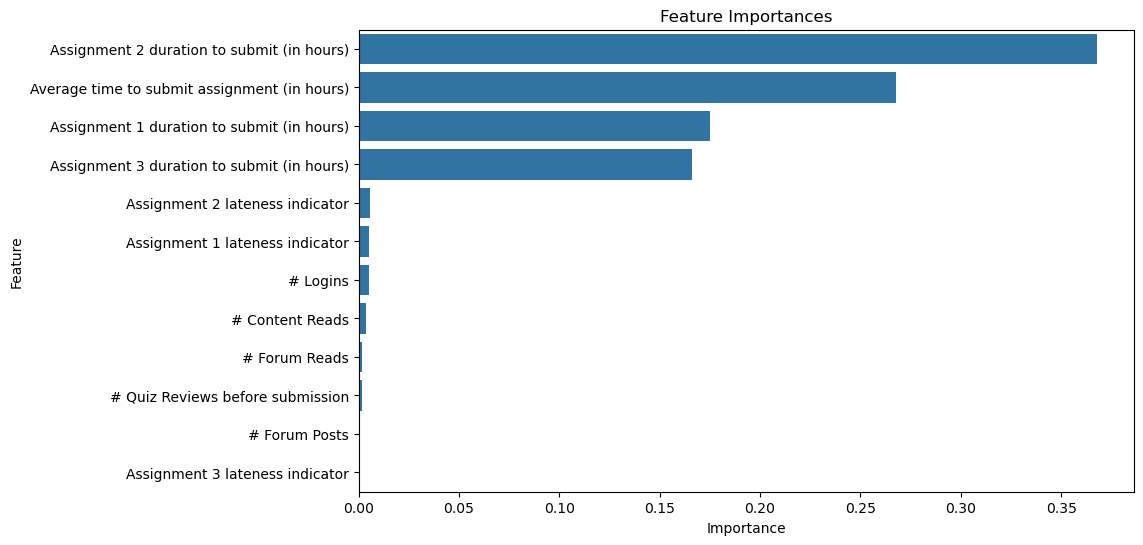

In [14]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances")
plt.show()

In [15]:
import joblib

joblib.dump(model, 'student_engagement_model.pkl')

['student_engagement_model.pkl']